In [ ]:
from typing import Dict,TypedDict,List
from langgraph.graph import StateGraph
from IPython.display import Image, display

In [12]:
class AgentState(TypedDict):
    code: str
    errors: List[str]
    iterations: int

In [13]:
def genrate_code(state: AgentState):
    print("---NODE: PROGRAMMER---")
    print(state)
    return {"code": "def hello() print('hi')"}

def find_errors(state: AgentState):
    print("--- Node 2: Identifying Error ---")
    print(state)
    return {"errors": ["SyntaxError: expected ':'"]}

def suggest_fix(state: AgentState):
    print("--- Node 3: Providing Fix ---")
    print(state)
    return {"errors": [], "iterations": state["iterations"] + 1}

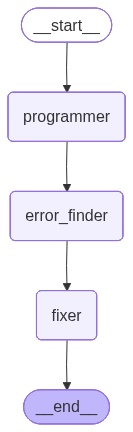

In [14]:
graph=StateGraph(AgentState)
graph.add_node("programmer",genrate_code)
graph.add_node("error_finder",find_errors)
graph.add_node("fixer",suggest_fix)

graph.set_entry_point("programmer")
graph.add_edge("programmer","error_finder")
graph.add_edge("error_finder","fixer")
graph.set_finish_point("fixer")

app=graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
final_results=app.invoke({"code":"","errors":[],"iterations":0})
print("Final Results:",final_results)

---NODE: PROGRAMMER---
{'code': '', 'errors': [], 'iterations': 0}
--- Node 2: Identifying Error ---
{'code': "def hello() print('hi')", 'errors': [], 'iterations': 0}
--- Node 3: Providing Fix ---
{'code': "def hello() print('hi')", 'errors': ["SyntaxError: expected ':'"], 'iterations': 0}
Final Results: {'code': "def hello() print('hi')", 'errors': [], 'iterations': 1}
